In [1]:
import numpy as np
from scipy.optimize import curve_fit
from PIL import Image

data = []

for n in range(11):
    im = Image.open(str(0.5 * float(n)) + '.jpg')
    im.load()
    pixels = np.asarray(im, dtype=float)
    int_pixs = np.mean(pixels, axis=2)
    data.append(int_pixs)
    
data = np.array(data, dtype=float).reshape((720, 720, 11))

FileNotFoundError: [Errno 2] No such file or directory: '0.0.jpg'

In [2]:
lbd = 1.0

def gauss_beam(r, C2, x0, y0, z0):
    global lbd
    x = r[0, :, :, :].flatten()
    y = r[1, :, :, :].flatten()
    z = r[2, :, :, :].flatten()
    w0 = np.sqrt(0.5 * lbd * z0 / np.pi)
    w = w0 * np.sqrt(1.0 + z**2/z0**2)
    return C2 * (w0**2 / w**2) * np.exp(-((x-x0)**2 + (y-y0)**2) / w**2)

xs = np.linspace(-4.0, 4.0, 720)
ys = np.linspace(-4.0, 4.0, 720)
zs = np.arange(0.0, 5.5, 0.5)[:3]

x, y, z = np.meshgrid(xs, ys, zs)

p0 = 1.2, 0.2, -0.2, 1.2
print(curve_fit(gauss_beam, (x, y, z), data[:, :, :3].flatten(), p0))

TypeError: list indices must be integers or slices, not tuple

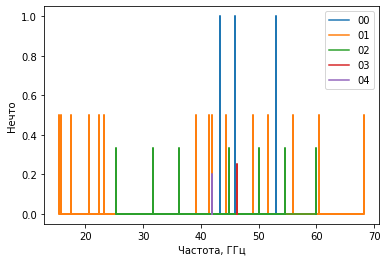

In [22]:
import numpy as np
import matplotlib.pyplot as plt

shift = 380.5

m_00 = np.array([380.5531, 380.5460, 380.5433]) - shift
m_01 = np.array([380.5559, 380.5517, 380.5490, 380.5392, 380.5224, 380.5232, 380.5605, 380.5682, 380.5419, 380.5443, 380.5155, 380.5158, 380.5175, 380.5207, 380.5414])-shift
m_02 = np.array([380.5545, 380.5448, 380.5362, 380.5317, 380.5254, 380.5501, 380.5599])-shift
m_03 = np.array([380.5463])-shift
m_04 = np.array([380.5419])-shift

m_00 = np.repeat(m_00, 3)
m_01 = np.repeat(m_01, 3)
m_02 = np.repeat(m_02, 3)
m_03 = np.repeat(m_03, 3)
m_04 = np.repeat(m_04, 3)

m_00_y = np.array([0.0, 1.0, 0.0] * (len(m_00) // 3))
m_01_y = np.array([0.0, 1.0 / 2.0, 0.0] * (len(m_01) // 3))
m_02_y = np.array([0.0, 1.0 / 3.0, 0.0] * (len(m_02) // 3))
m_03_y = np.array([0.0, 1.0 / 4.0, 0.0] * (len(m_03) // 3))
m_04_y = np.array([0.0, 1.0 / 5.0, 0.0] * (len(m_04) // 3))

plt.plot(m_00*1e3, m_00_y, label='00')
plt.plot(m_01*1e3, m_01_y, label='01')
plt.plot(m_02*1e3, m_02_y, label = '02')
plt.plot(m_03*1e3, m_03_y, label='03')
plt.plot(m_04*1e3, m_04_y, label='04')
plt.legend()

plt.xlabel("Частота, ГГц")
plt.ylabel("Нечто")


plt.savefig("/Users/goloshch/Desktop/dist.pdf")
plt.show()

0.27000000000043656

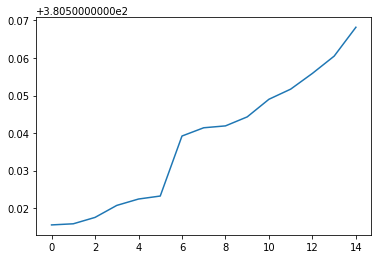

In [4]:
m_01 = np.array([380.5559, 380.5517, 380.5490, 380.5392, 380.5224, 380.5232, 380.5605, 380.5682, 380.5419, 380.5443, 380.5155, 380.5158, 380.5175, 380.5207, 380.5414])
m_01 = np.sort(m_01)

plt.plot(m_01)
m_01

np.mean(m_02[1:]-m_02[:-1]) * 1e3

In [18]:
r1, r2 = 0.99, 0.9

(1-r1*r2)/np.pi*(r1 * r2)

0.030913937836283566

In [19]:
(0.1*0.01)**2/(1-0.9*0.99)**2

8.416799932665602e-05